In [8]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [9]:
cars = pd.read_csv('data_clean.csv')
cars.drop(['Name'], axis = 1, inplace=True)
cars.head()


,Assemble,Type,Km,CarColor,InteriorColor,CarDoor,CarSeat,Gearbox,Price,Location,Status,EngineCar,Capacity,Trademark,ProductionYear
0,Lắp ráp trong nước,SUV,0,Trắng,Kem,5,5,Số tự động,2049,Hà Nội,mới,Xăng,2.0,Mercedes,2022
1,Nhập khẩu,SUV,0,Trắng,Màu khác,5,7,Số tự động,1989,Hà Nội,mới,Xăng,1.3,Mercedes,2022
2,Lắp ráp trong nước,SUV,0,Xanh,Đen,5,7,Số tự động,1083,Hà Nội,mới,Xăng,1.5,Honda,2022
3,Lắp ráp trong nước,Crossover,0,Đỏ,Đen,5,5,Số tự động,925,Hà Nội,mới,Xăng,2.0,Hyundai,2022
4,Lắp ráp trong nước,Sedan,0,Đen,Đen,4,5,Số tự động,2879,Hà Nội,cũ,Xăng,2.0,Mercedes,2021


In [10]:
cars.shape

(1950, 15)

In [11]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1950 entries, 0 to 1949
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Assemble        1950 non-null   object 
 1   Type            1950 non-null   object 
 2   Km              1950 non-null   int64  
 3   CarColor        1950 non-null   object 
 4   InteriorColor   1950 non-null   object 
 5   CarDoor         1950 non-null   int64  
 6   CarSeat         1950 non-null   int64  
 7   Gearbox         1950 non-null   object 
 8   Price           1950 non-null   int64  
 9   Location        1950 non-null   object 
 10  Status          1950 non-null   object 
 11  EngineCar       1950 non-null   object 
 12  Capacity        1950 non-null   float64
 13  Trademark       1950 non-null   object 
 14  ProductionYear  1950 non-null   int64  
dtypes: float64(1), int64(5), object(9)
memory usage: 228.6+ KB


# Visualing data 


Các Categorical Data:
---
- Asssemble
- Type
- CarColor
- InteriorColor
- GearBox
- Location
- Status
- EngineCar
- Trademark

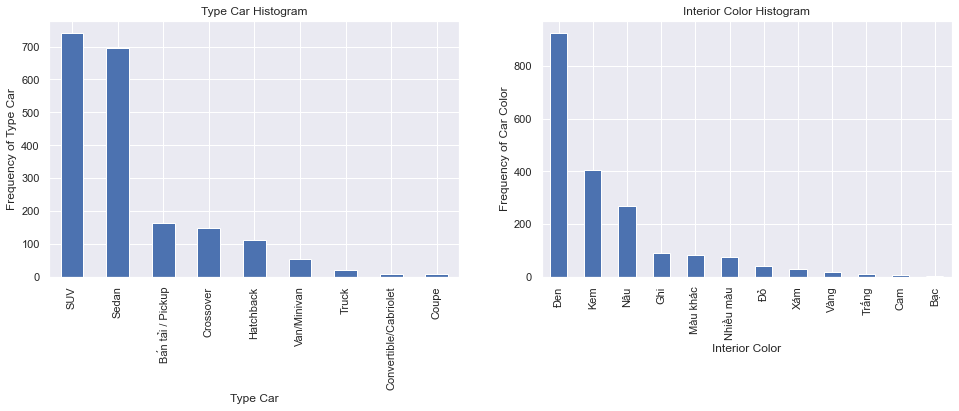

In [12]:
plt.figure(figsize=(25, 16))

plt.subplot(331)
plt1 = cars.Type.value_counts().plot( kind ='bar')
plt.title('Type Car Histogram')
plt1.set(xlabel = 'Type Car', ylabel='Frequency of Type Car')

plt.subplot(332)
plt1 = cars.InteriorColor.value_counts().plot(kind = 'bar')
plt.title('Interior Color Histogram')
plt1.set(xlabel = 'Interior Color', ylabel='Frequency of Car Color')

plt.show()


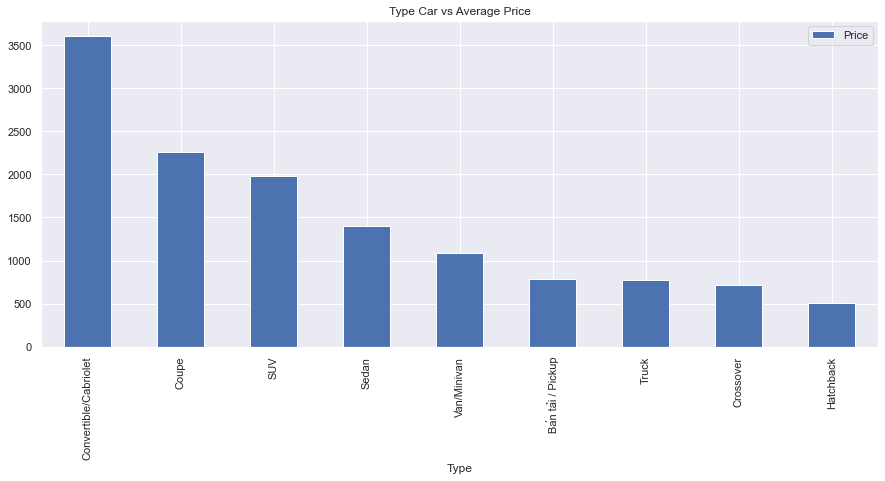

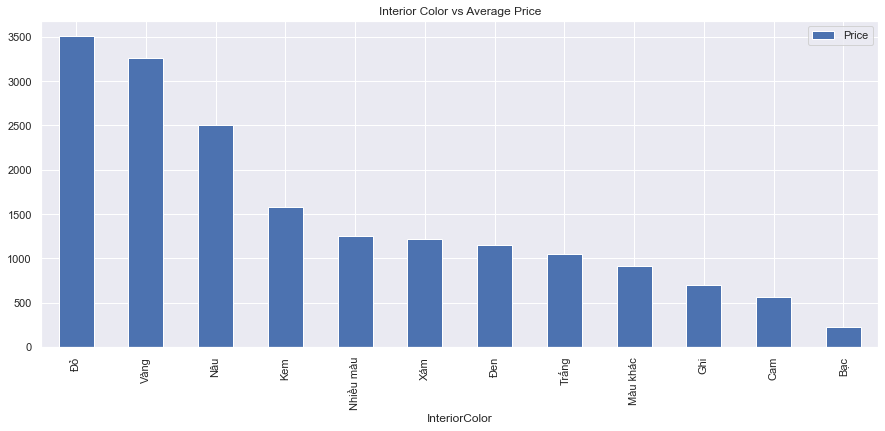

In [13]:
df = pd.DataFrame(cars.groupby(['Type'])['Price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(15,6))
plt.title('Type Car vs Average Price')
plt.show()

df = pd.DataFrame(cars.groupby(['InteriorColor'])['Price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(15,6))
plt.title('Interior Color vs Average Price')
plt.show()

KL:
1. SUV là loại xe được ưa chuộng nhiều nhất.
2. Màu nội thất màu đen được ưa chuộng nhiều nhất, nhưng mức giá của màu đỏ là cao nhất.

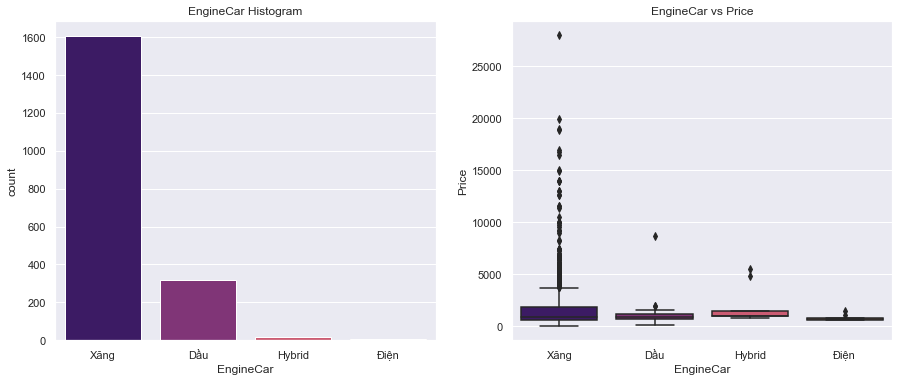

In [14]:
def plot_count(x,fig):
    plt.subplot(3,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(x=cars[x],palette=("magma"))
    plt.subplot(3,2,(fig+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=cars[x], y=cars.Price, palette=("magma"))
    
plt.figure(figsize=(15,20))
plot_count('EngineCar', 1)


 Kết luận:
- Loại xe chạy bằng nhiên liệu xăng được ưa chuộng nhiều nhất, sau đó đến dầu.
- Xe chạy bằng xăng cũng có mức giá bán cao nhất trong các loại.
- Hybrid cũng là loại nhiên liệu có mức giá cao, nên không được chuộng.
- Xe điện là loại xe mới gần đây nên có ít điều kiện thuận lợi để sử dụng (nơi tiếp nguyên liệu, sửa chữa) nên tuy là rẻ nhất nhưng ít người sử dụng.

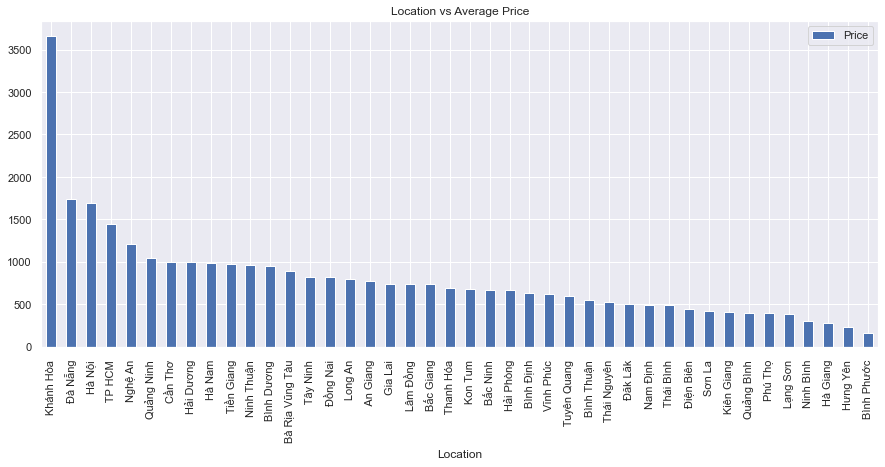

In [15]:
df = pd.DataFrame(cars.groupby(['Location'])['Price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(15,6))
plt.title('Location vs Average Price')
plt.show()


Kết luận:

    - Tỉnh Khánh Hòa là nơi có mức giá bán xe cao nhất.
    - Đà Nẵng - Hà Nội - HCM là 3 nơi có mức giá bán cao ngang nhau sau tỉnh Khánh Hòa. Trong khi các nơi khác mức giá không chênh lệch nhiều.

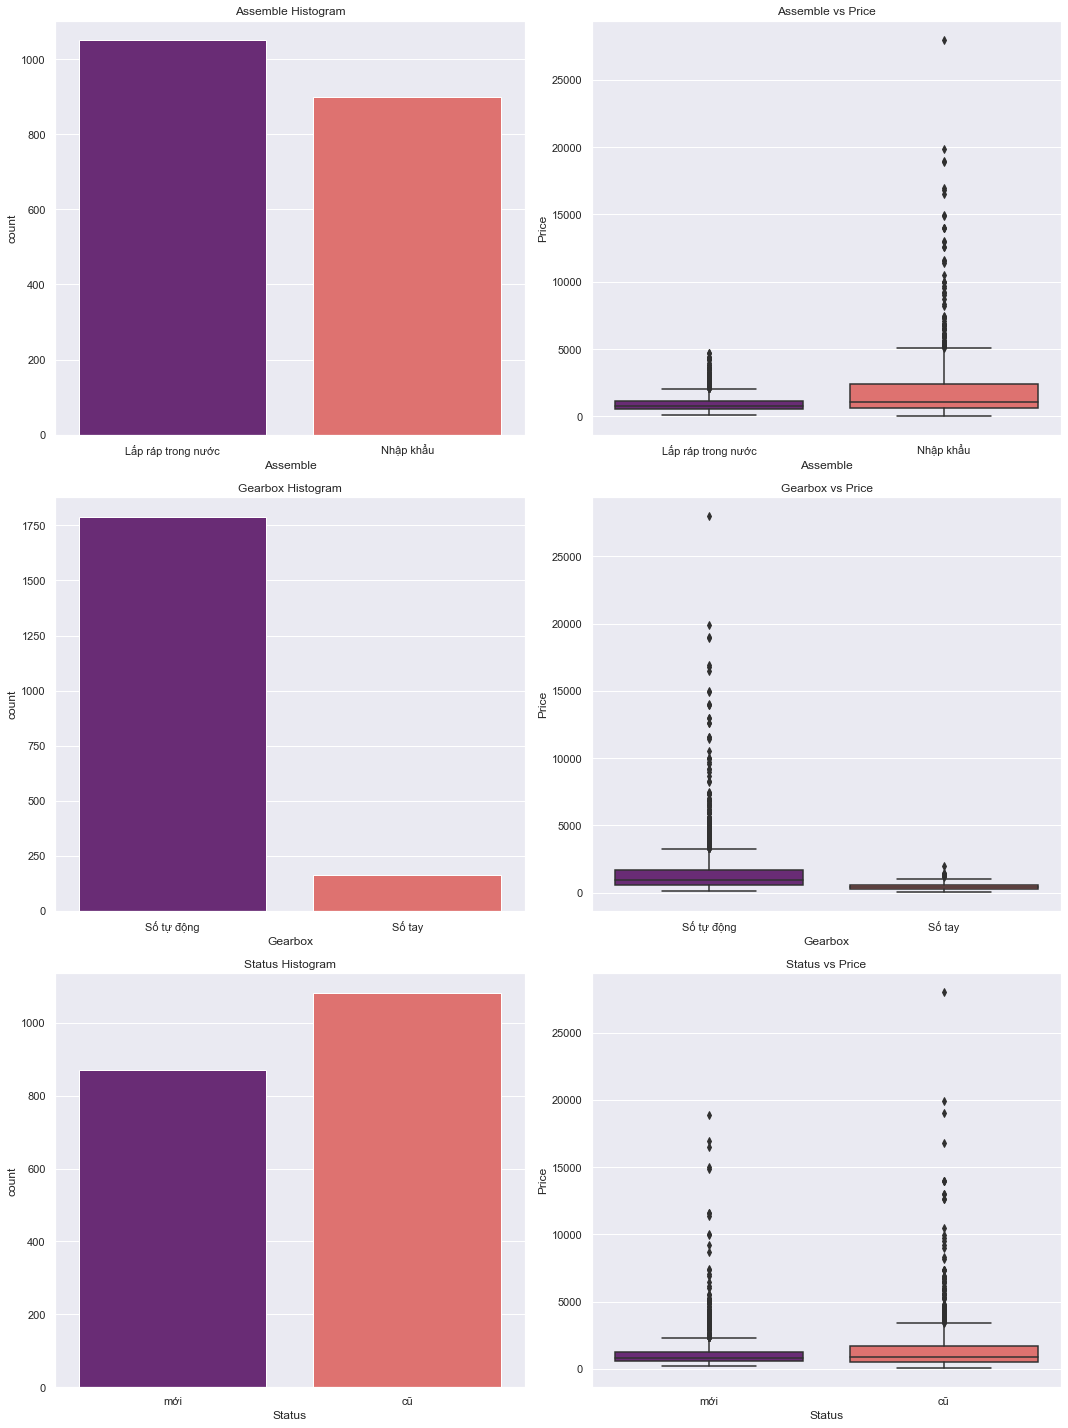

In [16]:
def plot_count(x,fig):
    plt.subplot(3,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(x=cars[x],palette=("magma"))
    plt.subplot(3,2,(fig+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=cars[x], y=cars.Price, palette=("magma"))
    
plt.figure(figsize=(15,20))

plot_count('Assemble', 1)
plot_count('Gearbox', 3)
plot_count('Status', 5)


plt.tight_layout()

Kết luận:
- Loại xe nhập khẩu có mức giá bán cao hơn loại lắp ráp trong nước. Nên loại lắp ráp trong nước được nhiều người bán hơn.
- Tuy loại xe số tự động có giá bán cao hơn loại xe số tay nhưng được nhiều người ưa chuộng bởi sự sang trọng và tiện dụng của nó.
- Loại xe mới hoặc cũ cũng ảnh hưởng tới giá xe. Cụ thể ở đây số lượng xe cũ được bán nhiều hơn và tầm giá cũng cao hơn.


Numeric Data
---
- Km
- CarDoor
- CarSeat
- Capacity
- ProductionYear

In [17]:
NummericData = [ "Km","CarDoor","CarSeat","Capacity","ProductionYear", "Price"]

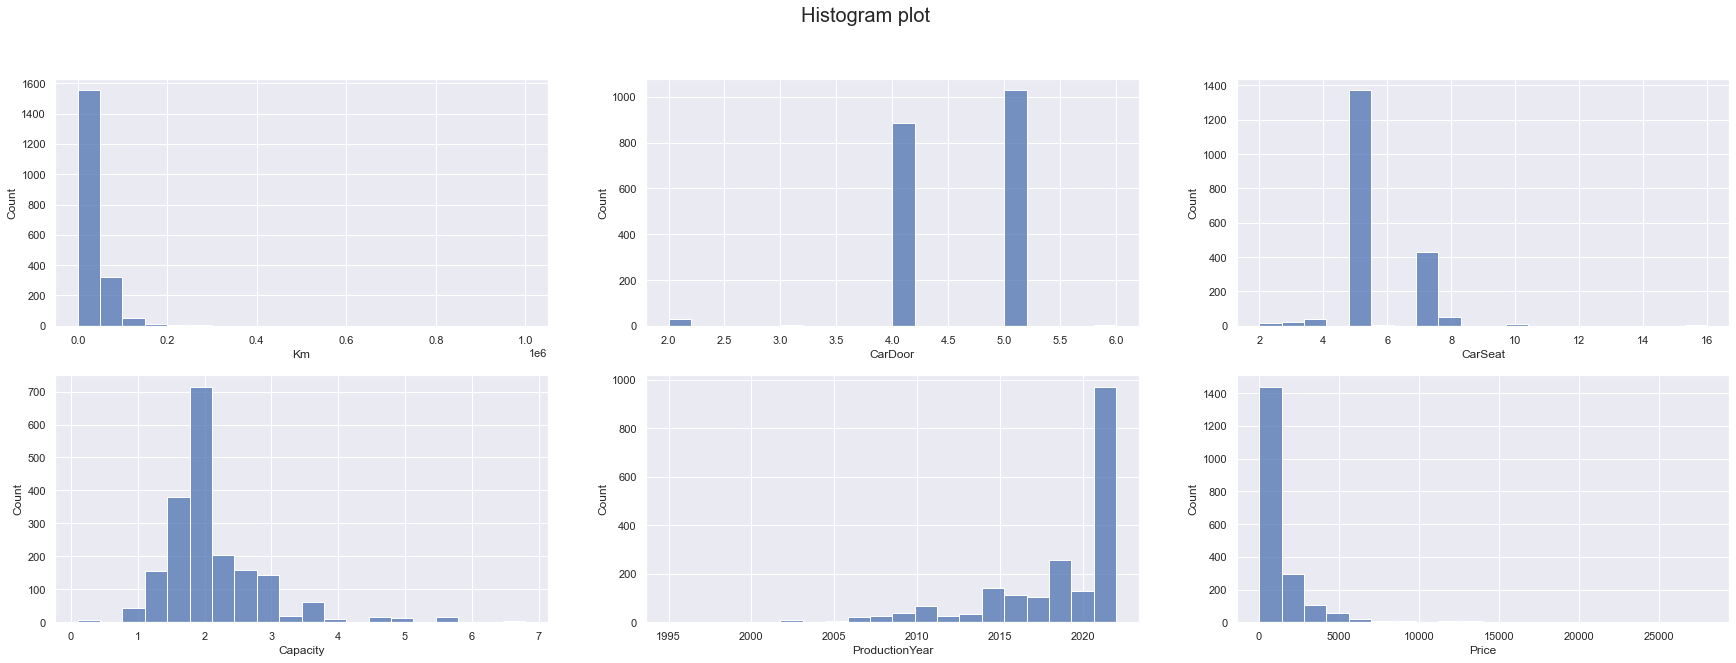

In [18]:
fig = plt.figure(figsize = (30,10))
fig.suptitle("Histogram plot", fontsize = 20)
for i in enumerate(NummericData):
    axe = fig.add_subplot(2,3, i[0]+1)
    # axe.set(title = f"Median: {cars[i[1]].median()}")
    # axe.axvline(cars[i[1]].median(), color = 'black', linestyle = '--')
    sns.histplot(x=cars[i[1]], ax = axe, bins=20)

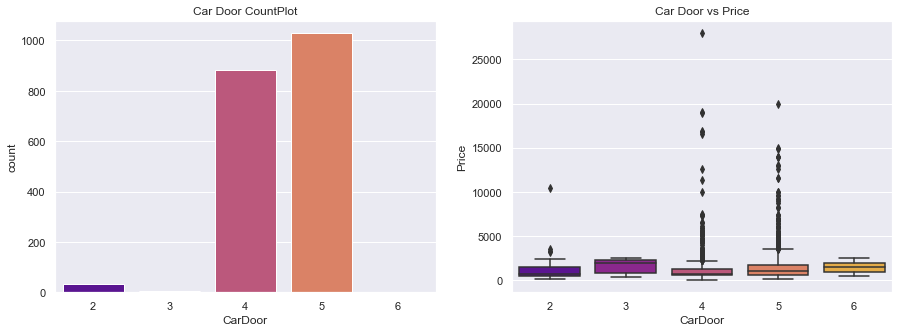

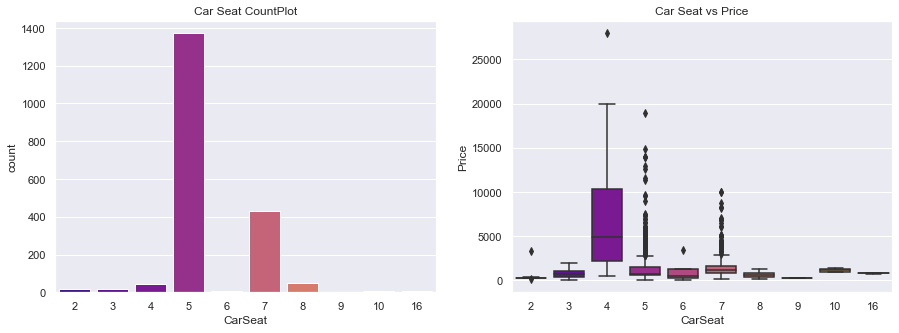

In [19]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Car Door CountPlot')
sns.countplot(x= cars.CarDoor, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Car Door vs Price')
sns.boxplot(x=cars.CarDoor, y=cars.Price, palette=("plasma"))

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Car Seat CountPlot')
sns.countplot(x=cars.CarSeat, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Car Seat vs Price')
sns.boxplot(x=cars.CarSeat, y=cars.Price, palette=("plasma"))

plt.show()

Kết luận:
- Số lượng xe 4 và 5 cửa được ưa chuộng nhiều nhất. Các loại xe 3 và 6 do giá thành cao nên ít được bán.
- Loại chỗ 5 và 7 được ưa chuộng nhiều nhất. Tuy nhiên loại xe 4 chỗ ngồi lại có tầm giá cao nhất.

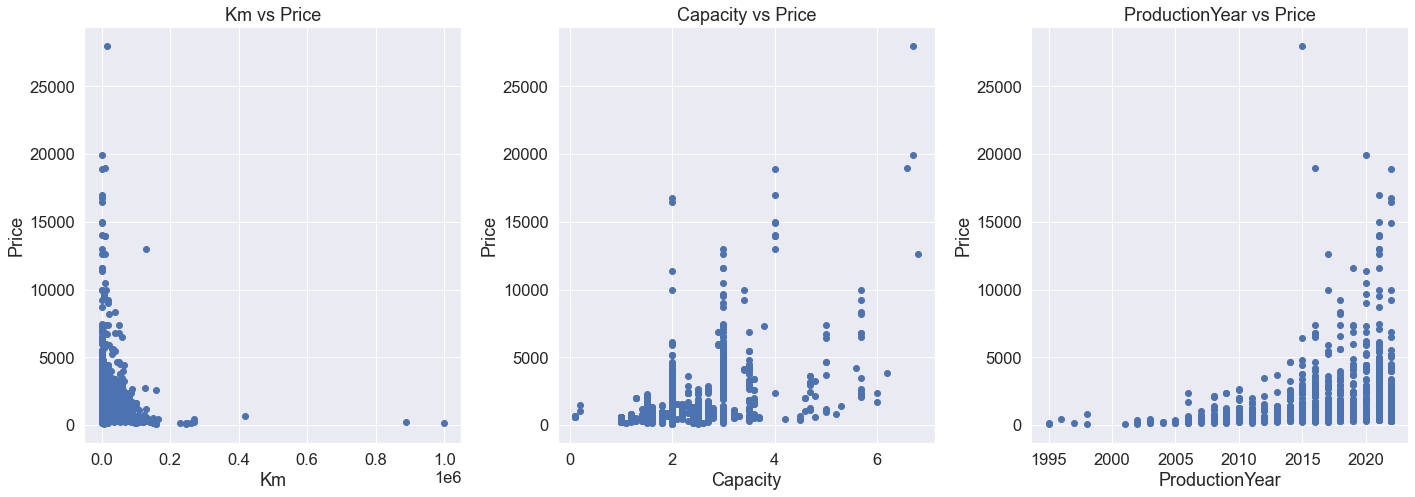

In [20]:
def scatter(x,fig):
    sns.set(font_scale = 1.5)
    plt.subplot(3,3,fig)
    plt.scatter(cars[x],cars['Price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(20,20))

scatter('Km', 1)
scatter('Capacity', 2)
scatter('ProductionYear', 3)

plt.tight_layout()

Kết luận:
- Số km đã chạy của ô tô ảnh hưởng tiêu cực tới giá tiền.
- Giá xe bán qua từng năm có sự tương quan tích cực tới giá tiền, đặc biệt từ khoảng năm 2015 đến nay.
- Xe có dung tích xăng càng lớn, giá xe càng cao nhưng số lượng bán ít. Xe có dung tích xăng bán nhiều tập trung ở giá trị 2 đến 4.

Tương quan giữa các biến Nummeric và với Price

[Text(0, 0.5, 'Km'),
 Text(0, 1.5, 'CarDoor'),
 Text(0, 2.5, 'CarSeat'),
 Text(0, 3.5, 'Capacity'),
 Text(0, 4.5, 'ProductionYear'),
 Text(0, 5.5, 'Price')]

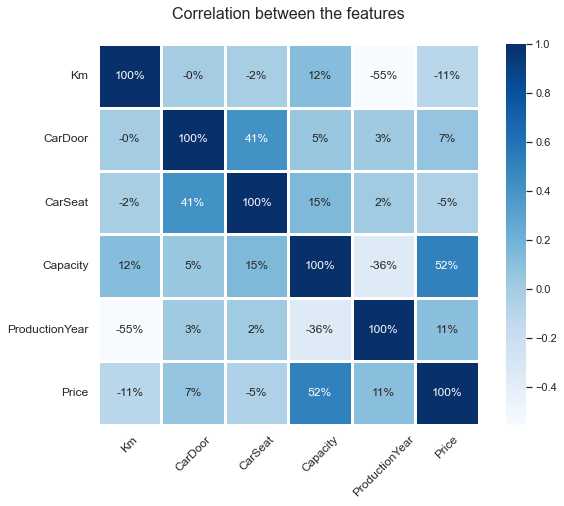

In [21]:
fig=plt.figure(figsize=(10,7))
sns.set(font_scale = 1)
axis=sns.heatmap(cars[NummericData].corr(), annot=True, linewidths=3, square=True, cmap='Blues', fmt=".0%")

axis.set_title('Correlation between the features', fontsize=16, y=1.05)
axis.set_xticklabels(NummericData, fontsize=12, rotation = 45)
axis.set_yticklabels(NummericData, fontsize=12, rotation= 0)

    - Dung tích xăng của xe có sự tương quan tích cực với giá xe nhưng lại tương quan tiêu cực với năm sản xuất.
    - Số km đã đi của xe có tương quan lớn tới năm sản xuất, do xe càng mới sản xuất thì số km đã đi càng ít, có thể là chưa đi.

Các đặc trưng có ảnh hưởng tới giá tiền (Price) sau khi đã trực quan hóa dữ liệu:
---

- Km
- Status
- ProductionYear
- CarColor
- CarSeat
- CarType
- CarDoor
- EngineCar
- Gearbox
- Assemble
- Interior Color
- Capacity

In [22]:
cars_lr = cars[['Km','Price', 'ProductionYear','CarSeat','CarColor','CarDoor', 'Type',
                  'EngineCar', 'Gearbox', 'Assemble','InteriorColor', 'Capacity', 'Status']]
cars_lr.head()

,Km,Price,ProductionYear,CarSeat,CarColor,CarDoor,Type,EngineCar,Gearbox,Assemble,InteriorColor,Capacity,Status
0,0,2049,2022,5,Trắng,5,SUV,Xăng,Số tự động,Lắp ráp trong nước,Kem,2.0,mới
1,0,1989,2022,7,Trắng,5,SUV,Xăng,Số tự động,Nhập khẩu,Màu khác,1.3,mới
2,0,1083,2022,7,Xanh,5,SUV,Xăng,Số tự động,Lắp ráp trong nước,Đen,1.5,mới
3,0,925,2022,5,Đỏ,5,Crossover,Xăng,Số tự động,Lắp ráp trong nước,Đen,2.0,mới
4,0,2879,2021,5,Đen,4,Sedan,Xăng,Số tự động,Lắp ráp trong nước,Đen,2.0,cũ


In [23]:
cars_lr.head()

,Km,Price,ProductionYear,CarSeat,CarColor,CarDoor,Type,EngineCar,Gearbox,Assemble,InteriorColor,Capacity,Status
0,0,2049,2022,5,Trắng,5,SUV,Xăng,Số tự động,Lắp ráp trong nước,Kem,2.0,mới
1,0,1989,2022,7,Trắng,5,SUV,Xăng,Số tự động,Nhập khẩu,Màu khác,1.3,mới
2,0,1083,2022,7,Xanh,5,SUV,Xăng,Số tự động,Lắp ráp trong nước,Đen,1.5,mới
3,0,925,2022,5,Đỏ,5,Crossover,Xăng,Số tự động,Lắp ráp trong nước,Đen,2.0,mới
4,0,2879,2021,5,Đen,4,Sedan,Xăng,Số tự động,Lắp ráp trong nước,Đen,2.0,cũ


In [24]:
cars_lr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1950 entries, 0 to 1949
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Km              1950 non-null   int64  
 1   Price           1950 non-null   int64  
 2   ProductionYear  1950 non-null   int64  
 3   CarSeat         1950 non-null   int64  
 4   CarColor        1950 non-null   object 
 5   CarDoor         1950 non-null   int64  
 6   Type            1950 non-null   object 
 7   EngineCar       1950 non-null   object 
 8   Gearbox         1950 non-null   object 
 9   Assemble        1950 non-null   object 
 10  InteriorColor   1950 non-null   object 
 11  Capacity        1950 non-null   float64
 12  Status          1950 non-null   object 
dtypes: float64(1), int64(5), object(7)
memory usage: 198.2+ KB


# Label Encoding cho các đặc trưng Categorical

In [25]:
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the cars_lr

cars_lr = dummies('CarColor',cars_lr)
cars_lr = dummies('Type',cars_lr)
cars_lr = dummies('EngineCar',cars_lr)
cars_lr = dummies('Gearbox',cars_lr)
cars_lr = dummies('Assemble',cars_lr)
cars_lr = dummies('InteriorColor',cars_lr)
cars_lr = dummies('Status',cars_lr)


### Tập datasets đã được Encoding

In [26]:
cars_lr.head()

,Km,Price,ProductionYear,CarSeat,CarDoor,Capacity,Cam,Cát,Ghi,Hồng,...,Kem,Màu khác,Nhiều màu,Nâu,Trắng,Vàng,Xám,Đen,Đỏ,mới
0,0,2049,2022,5,5,2.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0,1989,2022,7,5,1.3,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,0,1083,2022,7,5,1.5,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,925,2022,5,5,2.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,0,2879,2021,5,4,2.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# Chia tập Train / Test, xử lý ngoại lệ và chuẩn hóa dữ liệu 

## Chia tập Train / Test

In [27]:
from sklearn.model_selection import train_test_split

# train / test = 8 / 2
df_train, df_test = train_test_split(cars_lr, test_size = 0.2, random_state=42)

print(df_train.shape)
print(df_test.shape)

(1560, 46)
(390, 46)


## Xử lý ngoại lệ

***Tập train*** 

<AxesSubplot:>

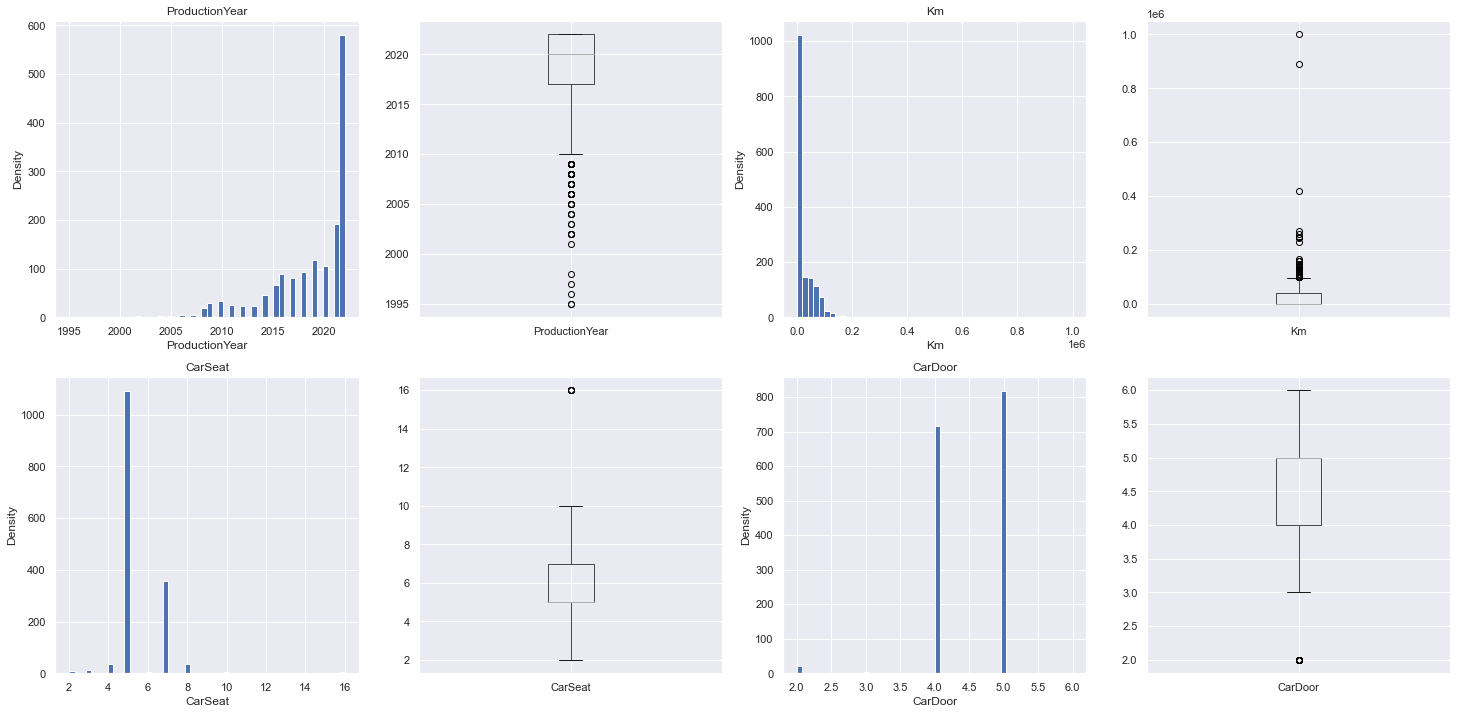

In [28]:
plt.figure(figsize=(25,12))

plt.subplot(2,4,1)
figure=df_train.ProductionYear.hist(bins=50)
figure.set_title('ProductionYear')
figure.set_xlabel('ProductionYear')
figure.set_ylabel('Density')
plt.subplot(2,4,2)
df_train.boxplot(column="ProductionYear")

plt.subplot(2,4,3)
figure=df_train.Km.hist(bins=50)
figure.set_title('Km')
figure.set_xlabel('Km')
figure.set_ylabel('Density')
plt.subplot(2,4,4)
df_train.boxplot(column="Km")

plt.subplot(2,4,5)
figure=df_train.CarSeat.hist(bins=50)
figure.set_title('CarSeat')
figure.set_xlabel('CarSeat')
figure.set_ylabel('Density')
plt.subplot(2,4,6)
df_train.boxplot(column="CarSeat")

plt.subplot(2,4,7)
figure=df_train.CarDoor.hist(bins=50)
figure.set_title('CarDoor')
figure.set_xlabel('CarDoor')
figure.set_ylabel('Density')
plt.subplot(2,4,8)
df_train.boxplot(column="CarDoor")



Kết luận:
- Có thể thấy đặc trưng ProductionYear có nhiều giá trị ngoại lệ lệch trái và đặc trưng Km cũng có nhiều giá trị ngoại lệ lệch phải.
- Trong khi đó đặc trưng CarSeat và CarDoor không có nhiều giá trị ngoại lệ.

=> Nên ta xử lý ngoại lệ cho 2 đặc trưng ProductionYear và Km.


***Áp dụng ngoại lệ***

In [29]:
# Tập train
#Km
IQR = df_train.Km.quantile(0.75)-df_train.Km.quantile(0.25)
# lower_bridge=cars_outlier['Km'].quantile(0.25)-(IQR*3)
upper_bridge = df_train['Km'].quantile(0.75)+(IQR*3)

df_train.loc[df_train['Km'] >= round(upper_bridge), 'Km'] = round(upper_bridge)

#ProductionYear
IQR = df_train.ProductionYear.quantile(0.75) - df_train.ProductionYear.quantile(0.25)
lower_bridge = df_train['ProductionYear'].quantile(0.25)-(IQR*3)
df_train.loc[df_train['ProductionYear'] < round(lower_bridge), 'ProductionYear'] = round(lower_bridge)

<h3 style="font-size: 30px; color:yellow">Kết quả</h3>

<AxesSubplot:>

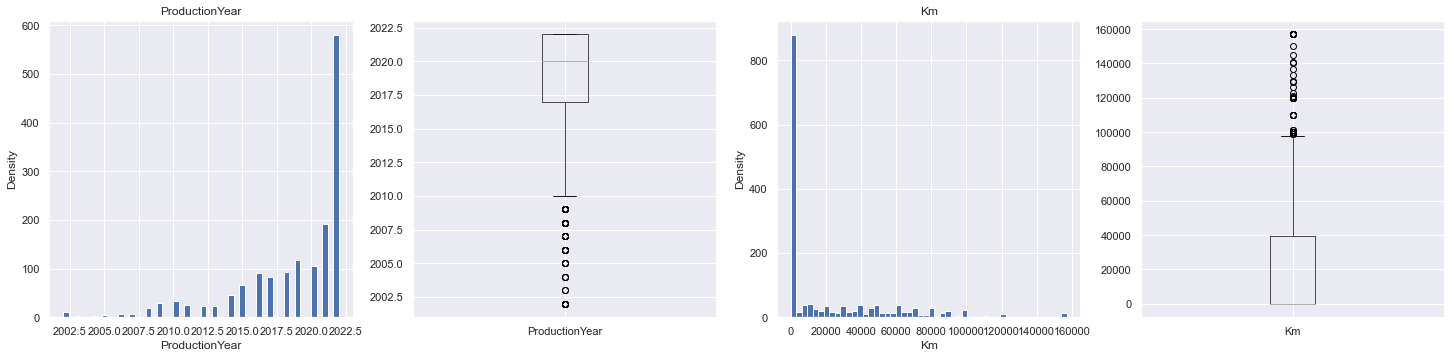

In [30]:
plt.figure(figsize=(25,12))

plt.subplot(2,4,1)
figure = df_train.ProductionYear.hist(bins=50)
figure.set_title('ProductionYear')
figure.set_xlabel('ProductionYear')
figure.set_ylabel('Density')
plt.subplot(2,4,2)
df_train.boxplot(column="ProductionYear")

plt.subplot(2,4,3)
figure = df_train.Km.hist(bins=50)
figure.set_title('Km')
figure.set_xlabel('Km')
figure.set_ylabel('Density')
plt.subplot(2,4,4)
df_train.boxplot(column="Km")

-> Một số giá trị lệch quá cao và quá thấp đã được xử lý, mặc dù vẫn còn nhiều giá trị nằm ngoài mức phân bố.

In [31]:
# Có xử lý ngoại lệ
X_train = df_train.copy()
X_test = df_test.copy()

print("X_train: {0}".format(X_train.shape))
print("X_test: {0}".format(X_test.shape))

X_train: (1560, 46)
X_test: (390, 46)


***Tách đặc trưng mục tiêu (Price)***

In [32]:
y_train = X_train.pop('Price')
y_test = X_test.pop('Price')


In [33]:
print("Y_train: {0}".format(y_train.shape))
print("y_test: {0}".format(y_test.shape))

Y_train: (1560,)
y_test: (390,)


## Chuẩn hóa dữ liệu

In [34]:
# Chuẩn hóa StandardScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_norm = pd.DataFrame(sc.fit_transform(X_train),columns=X_train.columns)
X_test_norm = pd.DataFrame(sc.transform(X_test),columns=X_test.columns)


In [35]:
X_train_norm.head()

,Km,ProductionYear,CarSeat,CarDoor,Capacity,Cam,Cát,Ghi,Hồng,Kem,...,Kem,Màu khác,Nhiều màu,Nâu,Trắng,Vàng,Xám,Đen,Đỏ,mới
0,1.351838,-0.386270,-0.436499,-0.850143,1.357658,-0.142389,-0.151495,-0.130189,-0.025327,-0.035829,...,-0.510995,-0.215122,5.088865,-0.39549,-0.062137,-0.088045,-0.122328,-0.969690,-0.140028,-0.896364
1,-0.294145,0.561185,-0.436499,-0.850143,0.095623,-0.142389,-0.151495,-0.130189,-0.025327,-0.035829,...,-0.510995,-0.215122,-0.196507,-0.39549,-0.062137,-0.088045,-0.122328,1.031258,-0.140028,-0.896364
2,-0.655463,-0.149406,-0.436499,-0.850143,0.852844,-0.142389,-0.151495,-0.130189,-0.025327,-0.035829,...,-0.510995,-0.215122,-0.196507,-0.39549,-0.062137,-0.088045,-0.122328,1.031258,-0.140028,-0.896364
3,-0.655463,0.798048,-0.436499,-0.850143,-0.156784,-0.142389,-0.151495,-0.130189,-0.025327,-0.035829,...,-0.510995,-0.215122,-0.196507,-0.39549,-0.062137,-0.088045,-0.122328,1.031258,-0.140028,1.115618
4,0.308051,-0.149406,-0.436499,0.865540,1.105251,-0.142389,-0.151495,-0.130189,-0.025327,-0.035829,...,-0.510995,-0.215122,-0.196507,-0.39549,-0.062137,-0.088045,-0.122328,-0.969690,7.141428,-0.896364


In [36]:
X_test_norm.head()

,Km,ProductionYear,CarSeat,CarDoor,Capacity,Cam,Cát,Ghi,Hồng,Kem,...,Kem,Màu khác,Nhiều màu,Nâu,Trắng,Vàng,Xám,Đen,Đỏ,mới
0,-0.655463,-0.149406,-0.436499,-0.850143,0.474234,-0.142389,-0.151495,-0.130189,-0.025327,-0.035829,...,-0.510995,-0.215122,-0.196507,-0.39549,-0.062137,-0.088045,-0.122328,1.031258,-0.140028,-0.896364
1,1.753323,-1.096861,-0.436499,-0.850143,-0.156784,-0.142389,-0.151495,-0.130189,-0.025327,-0.035829,...,-0.510995,-0.215122,-0.196507,2.52851,-0.062137,-0.088045,-0.122328,-0.969690,-0.140028,-0.896364
2,-0.655463,0.798048,-0.436499,0.865540,-0.661598,-0.142389,-0.151495,-0.130189,-0.025327,-0.035829,...,-0.510995,-0.215122,-0.196507,2.52851,-0.062137,-0.088045,-0.122328,-0.969690,-0.140028,1.115618
3,0.850028,-0.386270,-0.436499,0.865540,-0.156784,-0.142389,-0.151495,-0.130189,-0.025327,-0.035829,...,-0.510995,-0.215122,-0.196507,-0.39549,-0.062137,-0.088045,-0.122328,1.031258,-0.140028,-0.896364
4,0.759699,-0.859997,-0.436499,-0.850143,1.105251,-0.142389,-0.151495,-0.130189,-0.025327,-0.035829,...,-0.510995,-0.215122,-0.196507,-0.39549,-0.062137,-0.088045,-0.122328,1.031258,-0.140028,-0.896364


# Xây dựng Model Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Dùng LinerRegression
model_LR = LinearRegression()
model_LR.fit(X_train_norm, y_train)


LinearRegression()

In [38]:
# Dự đoán
predictions_LR  = model_LR.predict(X_test_norm)


In [39]:
from sklearn.metrics import r2_score 
r2_score_LR = r2_score(y_test,predictions_LR)
print(r2_score_LR)

0.5525971760686181


In [40]:
rs = {
  "Price_Test": y_test[:10],
  "Price_Predict": predictions_LR[:10]
}

df = pd.DataFrame(rs)
print(df)


      Price_Test  Price_Predict
1614         660    1106.818181
1405         825     766.284215
974         1020    1258.118697
1055        1779    1680.532774
307         2350    2105.456111
432         2850    3003.010670
1466        1303     410.923806
598          541     595.324250
1173         846    2583.475197
305          609     872.908262


In [41]:
print("Mean Y_test: {0}".format(np.mean(y_test)))
print("rmse: {0}".format(mean_squared_error(y_test,predictions_LR)**0.5))

Mean Y_test: 1420.551282051282
rmse: 1278.4079402921468


In [42]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
kfold = KFold(n_splits=10)
kfold = kfold.split(X_train, y_train)
rmses_LR = []

for k, (i_train, i_test) in enumerate(kfold):
    model_LR.fit(X_train.iloc[i_train, :], y_train.iloc[i_train])
    rmse = mean_squared_error( y_train.iloc[i_test],model_LR.predict(X_train.iloc[i_test, :]))**0.5
    rmses_LR.append(rmse)
    print('Fold: {0} : rmse = {1}'.format(k,rmse))
 
print('\n\nCross-Validation:\n mean {0} \n std: {1}'.format(np.mean(rmses_LR), np.std(rmses_LR)))

Fold: 0 : rmse = 1091.8977084174996
Fold: 1 : rmse = 1649.2692074902814
Fold: 2 : rmse = 1150.682530433901
Fold: 3 : rmse = 1123.5401893802784
Fold: 4 : rmse = 1432.1637199664833
Fold: 5 : rmse = 1589.8941591877012
Fold: 6 : rmse = 1089.773316020656
Fold: 7 : rmse = 2486.579755049933
Fold: 8 : rmse = 1468.1643853686774
Fold: 9 : rmse = 1394.8497844861085


Cross-Validation:
 mean 1447.681475580152 
 std: 398.9460515571444


# Xây dựng Model Random Forest Regressor


In [43]:
from sklearn.ensemble import RandomForestRegressor
model_RD = RandomForestRegressor(random_state=123)
model_RD.fit(X_train_norm, y_train)

RandomForestRegressor(random_state=123)

In [44]:
predictions_RD = model_RD.predict(X_test_norm)

In [45]:
from sklearn.metrics import r2_score 
r2_score_RD = r2_score(y_test, predictions_RD)
print(r2_score_RD)

0.8341776202691331


In [46]:
rs = {
  "Price_Test": y_test[:10],
  "Price_Predict": predictions_RD[:10]
}

df = pd.DataFrame(rs)
print(df)


      Price_Test  Price_Predict
1614         660     643.696667
1405         825     793.300000
974         1020    1006.230000
1055        1779    1918.010000
307         2350    3571.235000
432         2850    2283.540000
1466        1303    1071.965357
598          541     549.606952
1173         846     806.617333
305          609     746.509667


In [47]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_test, predictions_RD))

778.2903947694842

In [48]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
kfold = KFold(n_splits=10)
kfold = kfold.split(X_train, y_train)
rmses = []

for k, (i_train, i_test) in enumerate(kfold):
    model_RD.fit(X_train.iloc[i_train, :], y_train.iloc[i_train])
    rmse = mean_squared_error( y_train.iloc[i_test],model_RD.predict(X_train.iloc[i_test, :]))**0.5
    rmses.append(rmse)
    print('Fold: {0} : rmse = {1}'.format(k,rmse))
 
print('\n\nCross-Validation:\n mean {0} \n std: {1}'.format(np.mean(rmses), np.std(rmses)))

Fold: 0 : rmse = 419.4269572908994
Fold: 1 : rmse = 1017.0760576429058
Fold: 2 : rmse = 522.0486540120061
Fold: 3 : rmse = 610.300371061352
Fold: 4 : rmse = 813.1382530731101
Fold: 5 : rmse = 851.8486007939492
Fold: 6 : rmse = 598.0101795062715
Fold: 7 : rmse = 2048.7337265036826
Fold: 8 : rmse = 1193.7802813109479
Fold: 9 : rmse = 667.84586375923


Cross-Validation:
 mean 874.2208944954355 
 std: 450.0708464077029


## Tìm siêu tham số cho Model

In [49]:
# Number of trees in random forest
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
param_grid = {
    'max_depth': [50, 80, 100],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
}
bootstrap = ['True', 'False']
# Create the random grid
random_grid = {
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [50]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=model_RD, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)
# Fit the grid search to the data
grid_fit = grid_search.fit(X_train_norm, y_train)
best_parameters = grid_fit.best_params_
best_parameters

Fitting 3 folds for each of 54 candidates, totalling 162 fits


{'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

Áp dụng siêu tham số vào model

In [51]:
model_RD1 = RandomForestRegressor(random_state=123, n_estimators=100, bootstrap=False, max_depth=50, max_features='auto', min_samples_leaf=1, min_samples_split=2)
model_RD1.fit(X_train_norm, y_train)
predictions_RD1 = model_RD1.predict(X_test_norm)

In [52]:
from sklearn.metrics import r2_score 
r2_score_RD1 = r2_score(y_test,predictions_RD1)
print(r2_score_RD1)

0.8684537231603995


In [54]:
rs = {
  "Price_Test": y_test[:10],
  "Price_Predict": predictions_RD1[:10]
}

df = pd.DataFrame(rs)
print(df)

      Price_Test  Price_Predict
1614         660     668.820000
1405         825     770.120000
974         1020    1020.000000
1055        1779    1763.650000
307         2350    3111.800000
432         2850    2588.000000
1466        1303    1033.000000
598          541     565.333333
1173         846     800.000000
305          609     609.525000


In [55]:
print("Mean Y_test: {0}".format(np.mean(y_test)))
print("rmse: {0}".format(mean_squared_error(y_test,predictions_RD1)**0.5))

Mean Y_test: 1420.551282051282
rmse: 693.2013172439097


In [56]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
kfold = KFold(n_splits=10)
kfold = kfold.split(X_train_norm, y_train)
rmses_RD1 = []

for k, (i_train, i_test) in enumerate(kfold):
    model_RD1.fit(X_train_norm.iloc[i_train, :], y_train.iloc[i_train])
    rmse = mean_squared_error( y_train.iloc[i_test],model_RD1.predict(X_train_norm.iloc[i_test, :]))**0.5
    rmses_RD1.append(rmse)
    print('Fold: {0} : rmse = {1}'.format(k,rmse))
 
print('\n\nCross-Validation:\n mean {0} \n std: {1}'.format(np.mean(rmses_RD1), np.std(rmses_RD1)))

Fold: 0 : rmse = 609.7979091437885
Fold: 1 : rmse = 1334.9439364465911
Fold: 2 : rmse = 571.067244328333
Fold: 3 : rmse = 920.0227421603065
Fold: 4 : rmse = 814.0012879292242
Fold: 5 : rmse = 886.4280316401773
Fold: 6 : rmse = 736.0561813263963
Fold: 7 : rmse = 2000.7100498421564
Fold: 8 : rmse = 1210.438140386532
Fold: 9 : rmse = 747.6002306833899


Cross-Validation:
 mean 983.1065753886896 
 std: 409.7001117427467


# So sánh hiệu quả giữa 2 mô hình

## Test Vs Prediction


In [57]:
data_LR = {'y_test': y_test, 'y_prediction': predictions_LR}
data_LR = pd.DataFrame(data = data_LR)

data_RD1 = {'y_test': y_test, 'y_prediction': predictions_RD1}
data_RD1 = pd.DataFrame(data = data_RD1)

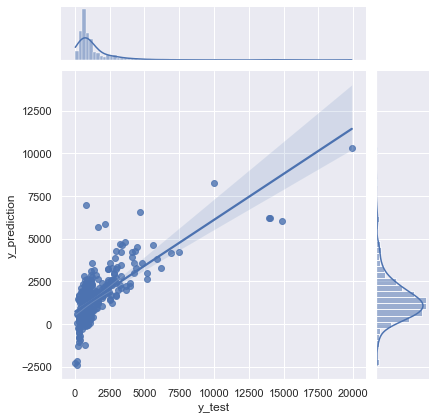

In [58]:
#Linear Regression
sns.jointplot(data = data_LR, x="y_test", y="y_prediction", kind='reg')


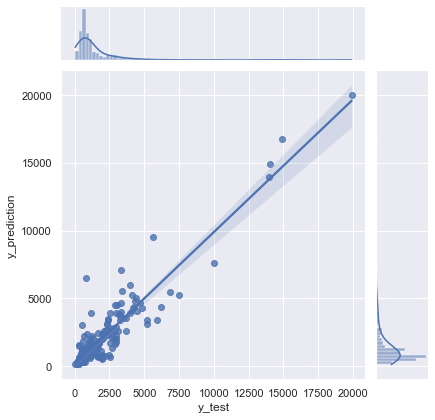

In [59]:
#Random Forrest Regressr w/ best params
sns.jointplot(data = data_RD1, x="y_test", y="y_prediction", kind='reg')


**Nhận xét**:

    - Với mô hình Linear Regression thì tập dữ liệu Price dự đoán với Price kiểm thử không có sự hồi quy với nhau.
    - Với mô hình Random Forest Regressor thì 2 tập dữ liệu Price dự đoán và Price kiểm thử có sự tương quan đồng biến.
***=> Mô hình Random Forest Regressor với siêu tham số cho ra kết quả dự đoán tốt hơn.***

## R2_Score


In [60]:
rs_r2 = {'r2_score': [r2_score_LR, r2_score_RD1]}
df1 = pd.DataFrame(data = rs_r2)


name_model = {'model': ['LinearRegression', 'RandomForestRegressor w/ best params']}
df2 = pd.DataFrame(data = name_model)


In [61]:
df4 = pd.concat([df2, df1], axis=1)
df4

,model,r2_score
0,LinearRegression,0.552597
1,RandomForestRegressor w/ best params,0.868454


**Nhận xét**

    - Có thể thấy với mô hình Random Forest Regressor có điểm r2 cao hơn rất nhiều, hơn khoảng 0.311402.
    - Chứng tỏ mức độ phù hợp của mô hình Random Forest Regressor tốt hơn, dữ liệu test hợp với dữ liệu dự đoán ở mức 86.534% (1 chỉ số cao).

## So sánh RMSE theo kỹ thuật K-Fold

***K-Fold***

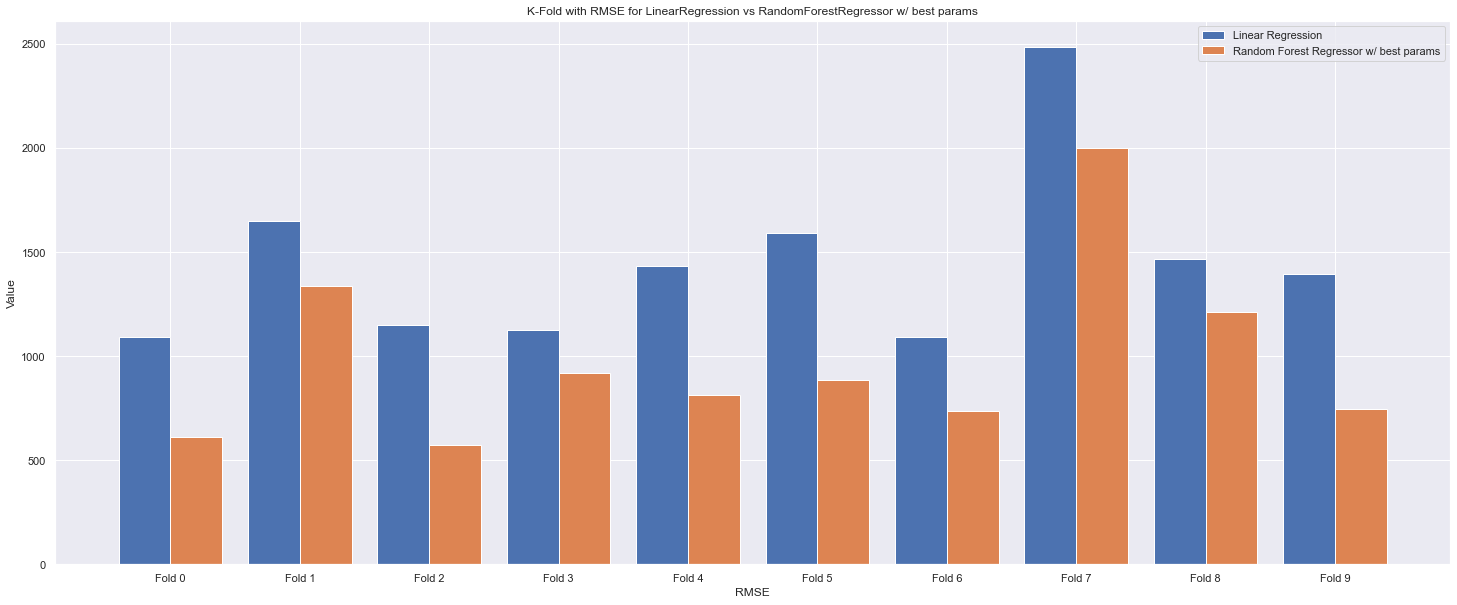

In [62]:
X = ['Fold 0','Fold 1','Fold 2','Fold 3', 'Fold 4', 'Fold 5', 'Fold 6', 'Fold 7', 'Fold 8', 'Fold 9']
Ygirls = [10,20,20,40]
Zboys = [20,30,25,30]
  
X_axis = np.arange(len(X))

plt.figure(figsize=(25,10))
plt.bar(X_axis - 0.2, rmses_LR , 0.4, label = 'Linear Regression')
plt.bar(X_axis + 0.2, rmses_RD1, 0.4, label = 'Random Forest Regressor w/ best params')
  
plt.xticks(X_axis, X)
plt.xlabel("RMSE")
plt.ylabel("Value")
plt.title("K-Fold with RMSE for LinearRegression vs RandomForestRegressor w/ best params")
plt.legend()
plt.show()

***RMSE mean***

In [63]:
mean_rmses_LR = np.array(rmses_LR).mean()
mean_rmese_RD1 = np.array(rmses_RD1).mean()

rs_r2 = {'rmse_mean': [mean_rmses_LR, mean_rmese_RD1]}
df1 = pd.DataFrame(data = rs_r2)

name_model = {'model': ['LinearRegression', 'RandomForestRegressor w/ best params']}
df2 = pd.DataFrame(data = name_model)

df4 = pd.concat([df2, df1], axis=1)
df4


,model,rmse_mean
0,LinearRegression,1447.681476
1,RandomForestRegressor w/ best params,983.106575


**Nhận xét**

    - RMSE của RandomForestRegessor với siêu tham số theo kỹ thuật K-Fold cho ra giá trị thấp hơn và giá trị mean cũng vậy so với LinearRegression.

***=> Từ những so sánh trên, ta có thể dễ dàng đưa ra kết luận với mô hình RandomForestRegessor với siêu tham số là một mô hình tốt và nên được lựa chọn trong các bài toán về hồi quy.***
    
    